## Auotencoder

**packages**

In [3]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn

import numpy as np
import os
import matplotlib.pyplot as plt

**Loading MNIST dataset**

In [5]:
mnist_data = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = transforms.ToTensor())
 

**Creating Train Data Loader**

In [6]:
train_loader = DataLoader(dataset = mnist_data, batch_size = 32, shuffle = True)

**Building Autoencoder Network**

In [8]:
class autoencoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(784, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 784),
            torch.nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

**Initializing Loss and Optimizer**

In [6]:
model = autoencoder()
MSE = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay=0.0000001)


**Trainer Function**

In [9]:
def trainer(epochs):
    losses = []
    for epoch in range(epochs):
        for (images, labels) in train_loader:
            encoded, decoded = model(images)

            loss = MSE(decoded, images.reshape(-1, 784))
            

            optimizer.zero_grad()
            loss.backward()
            optimizer.steptorch()

            losses.append(loss)
            
        print('Mean Loss after epoch ',epoch,':', loss.mean())


In [10]:
trainer(20)

Mean Loss after epoch  0 : tensor(0.0216, grad_fn=<MeanBackward0>)
Mean Loss after epoch  1 : tensor(0.0163, grad_fn=<MeanBackward0>)
Mean Loss after epoch  2 : tensor(0.0118, grad_fn=<MeanBackward0>)
Mean Loss after epoch  3 : tensor(0.0130, grad_fn=<MeanBackward0>)
Mean Loss after epoch  4 : tensor(0.0081, grad_fn=<MeanBackward0>)
Mean Loss after epoch  5 : tensor(0.0081, grad_fn=<MeanBackward0>)
Mean Loss after epoch  6 : tensor(0.0098, grad_fn=<MeanBackward0>)
Mean Loss after epoch  7 : tensor(0.0077, grad_fn=<MeanBackward0>)
Mean Loss after epoch  8 : tensor(0.0082, grad_fn=<MeanBackward0>)
Mean Loss after epoch  9 : tensor(0.0056, grad_fn=<MeanBackward0>)
Mean Loss after epoch  10 : tensor(0.0089, grad_fn=<MeanBackward0>)
Mean Loss after epoch  11 : tensor(0.0075, grad_fn=<MeanBackward0>)
Mean Loss after epoch  12 : tensor(0.0063, grad_fn=<MeanBackward0>)
Mean Loss after epoch  13 : tensor(0.0078, grad_fn=<MeanBackward0>)
Mean Loss after epoch  14 : tensor(0.0078, grad_fn=<MeanBa

**Save model**

In [20]:
torch.save(model.state_dict(), os.path.join('models', 'auto_encoder_model.pth'))


**Load model**

In [9]:
model = autoencoder()
model.load_state_dict(torch.load(os.path.join('models', 'auto_encoder_model.pth'), map_location=lambda storage, loc: storage))

<All keys matched successfully>

**Testing**

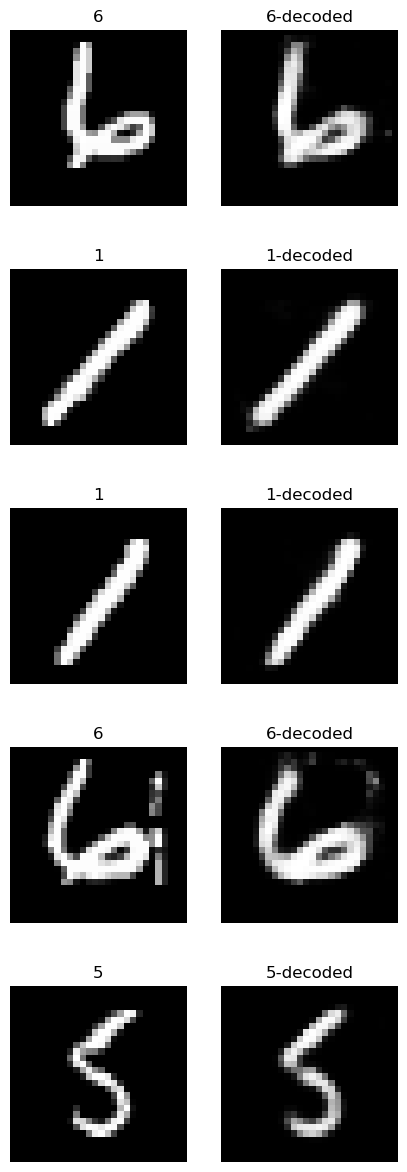

In [49]:
images, labels = next(iter(train_loader))
encoded, dec_images = model(images)
dec_images = dec_images.detach().numpy()
fig, axes = plt.subplots(figsize=(5,15), nrows=5, ncols=2)

for i in range(5):
    ax = axes[i]
    ax[0].imshow(images[i].reshape(28,28), cmap='gray')
    ax[0].title.set_text(labels[i].item())
    ax[0].axis('off')
    
    ax[1].imshow(dec_images[i].reshape(28,28), cmap='gray')
    ax[1].title.set_text(str(labels[i].item())+'-decoded')
    ax[1].axis('off')
    
    
plt.show()

**Encoded features of dimension 32**

In [54]:
encoded[0].shape

torch.Size([32])

In [48]:
encoded[:5]

tensor([[-8.2582, -0.6311,  1.1807, -1.3694, -2.2765, -1.8769,  2.0295, -0.1060,
          4.2401, -0.6941, -1.5917,  2.0675, -0.1685,  7.6786, -1.7673, -4.1686,
          0.5358, -0.1188,  2.2064, -1.2285,  1.0169, -1.2751, -0.0219, -0.5468,
         -2.8371, -4.3564,  2.6133, -0.0549, -2.0971,  4.3427, -1.2338, -4.7226],
        [-1.2973, -1.7698,  1.7049, -0.5874,  3.3200,  0.9662, -0.6932,  2.2705,
          0.3078, -1.5072, -2.1222, -4.0139,  1.8490,  4.8717, -2.4797,  0.8848,
          0.3572, -3.6324, -2.8645, -0.3763, -3.2172,  2.2511,  0.1456, -1.6502,
          4.9821, -1.3295, -1.8828,  0.6348,  0.0330, -1.1315, -0.4542, -2.2963],
        [-3.6061, -0.0717,  2.3378, -1.8096,  1.5717, -0.5335, -2.2740,  1.2262,
         -0.0094, -0.4703, -1.9620, -3.3267, -0.3404,  5.6577,  1.1234,  1.7341,
         -0.3641, -2.7342, -1.0932,  0.9983, -3.5850,  0.0616, -2.2065, -0.9892,
          5.3758,  2.9026,  0.4070, -0.3925,  0.3189, -1.2339, -1.9242, -2.4663],
        [-4.7400, -1.2443